## Import Libraries

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## 1. Problem Statement/ Business Problem

In [ ]:
# Hypothesis Generation

To predict SepalLengthCm values from independent variables

Dependent Var >> SepalLengthCm
Independent var >> Sepalwidthcm ,petallengthcm ,petalwidth, species

## 2. Data Gathering

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
row_count = df.shape[0]
col_count = df.shape[1]
print(row_count, col_count)

150 6


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 3. Exploratory Data Analysis

#### 3.1 ID

In [10]:
df['Id'].nunique()

150

In [11]:
df.drop('Id', axis =1 ,inplace=True)

#### 3.2 SepalWidthCm

In [12]:
df['SepalWidthCm'].nunique()

23

In [13]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

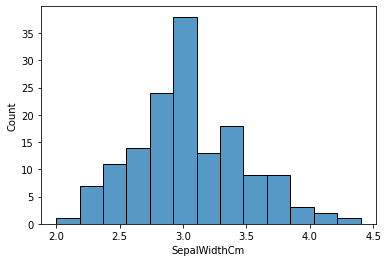

In [14]:
sns.histplot(df['SepalWidthCm'])

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

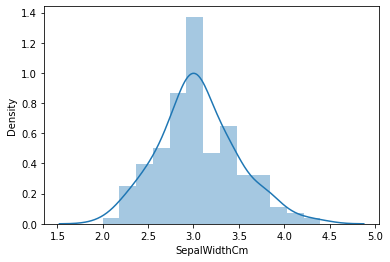

In [16]:
sns.distplot(df['SepalWidthCm'])

#### 3.3 PetalLengthCm

In [17]:
df['PetalLengthCm'].nunique()

43

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

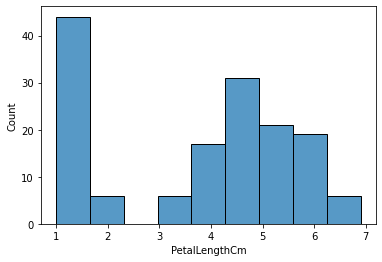

In [18]:
sns.histplot(df['PetalLengthCm'])

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

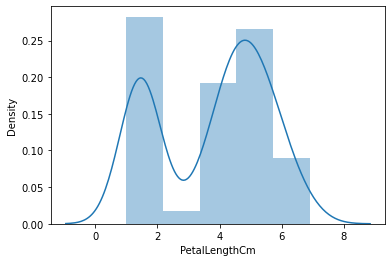

In [19]:
sns.distplot(df['PetalLengthCm'])

#### Conclusion : This feature may require transformations

#### 3.4 PetalWidthCm

In [20]:
df['PetalWidthCm'].nunique()

22

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

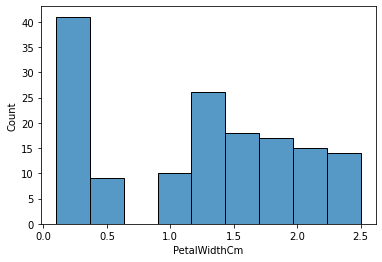

In [21]:
sns.histplot(df['PetalWidthCm'])

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

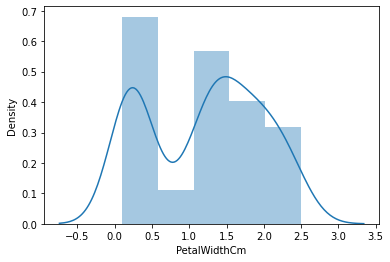

In [22]:
sns.distplot(df['PetalWidthCm'])

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

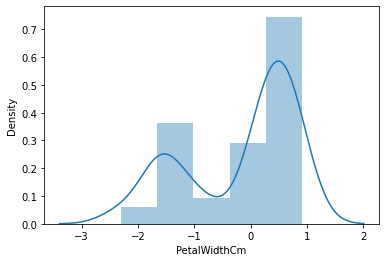

In [93]:
sns.distplot(np.log(df['PetalWidthCm']))

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

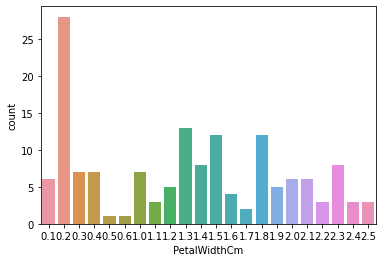

In [23]:
sns.countplot(df['PetalWidthCm'])

#### 3.5 Species

In [24]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

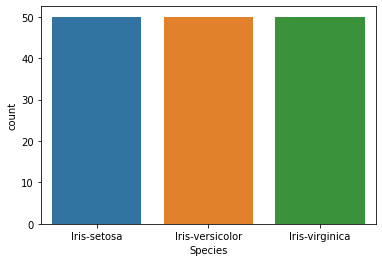

In [26]:
sns.countplot(df['Species'])

In [27]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


<AxesSubplot:>

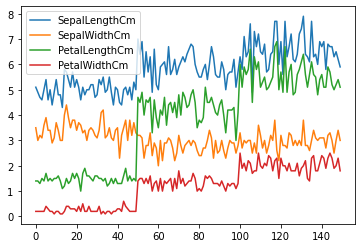

In [28]:
df.plot()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

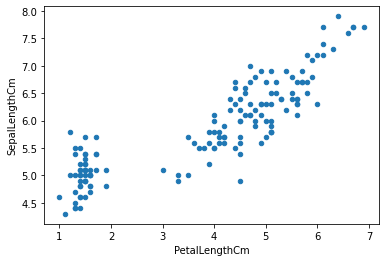

In [30]:
df.plot(x = 'PetalLengthCm', y = 'SepalLengthCm', kind = 'scatter')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

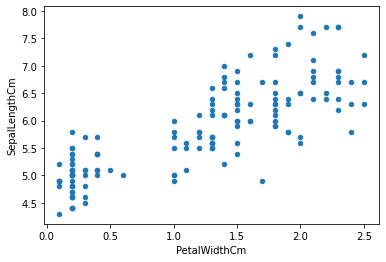

In [31]:
df.plot(x = 'PetalWidthCm', y = 'SepalLengthCm', kind = 'scatter')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

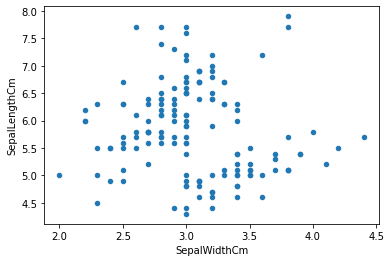

In [32]:
df.plot(x = 'SepalWidthCm', y = 'SepalLengthCm', kind = 'scatter')

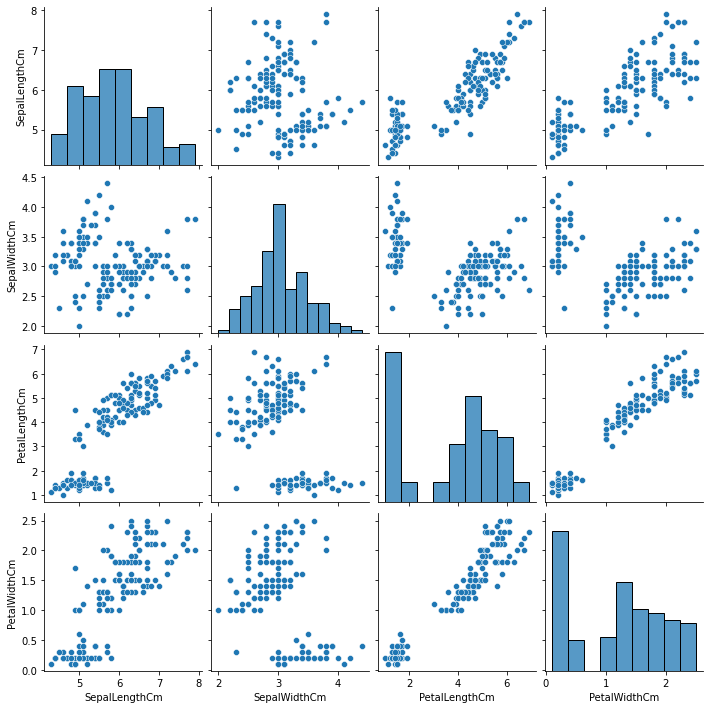

In [33]:
sns.pairplot(df)

## 4. Feature Engineering/ Data Pre-Processing

In [34]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [36]:
df.select_dtypes(include='object')

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [37]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [38]:
# Encoding  >> converting categorical features to numeric
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 5. Feature Selection

In [40]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


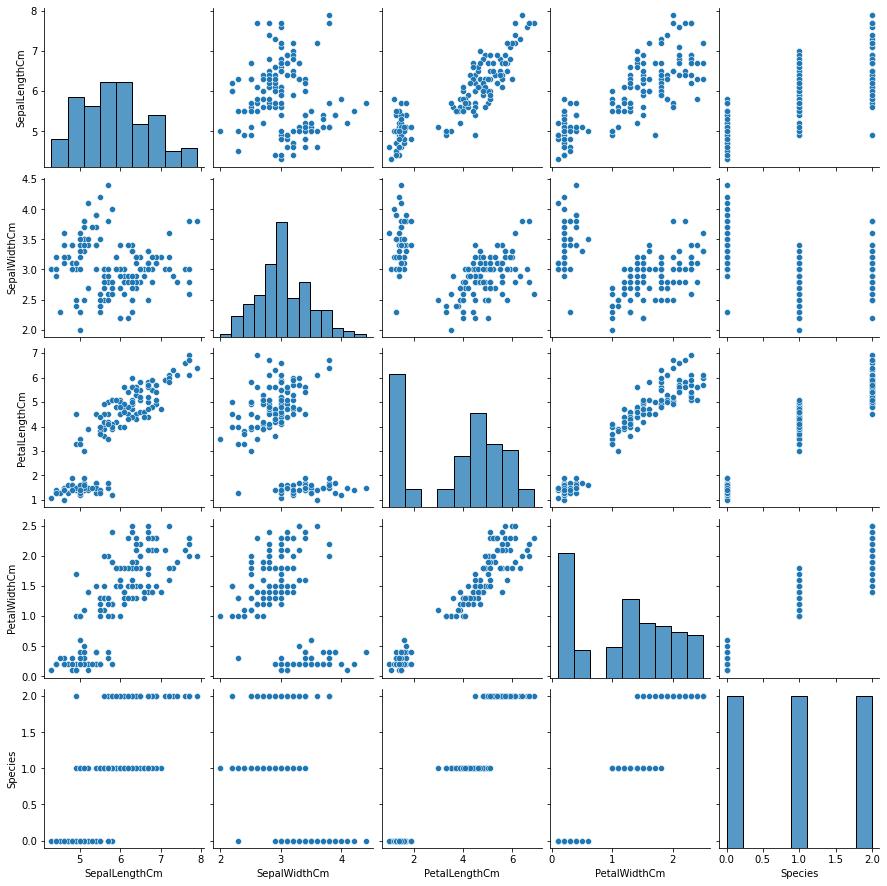

In [41]:
sns.pairplot(df)

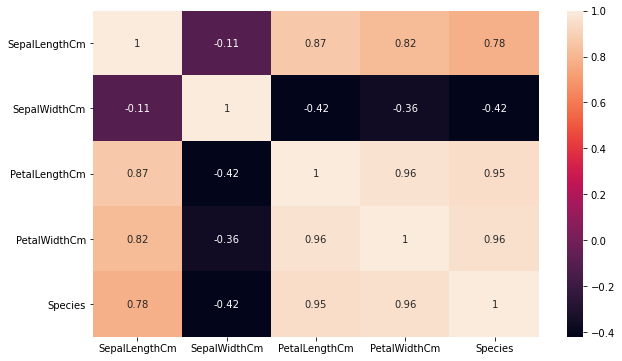

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.savefig('Correlation_Matrix.jpg')

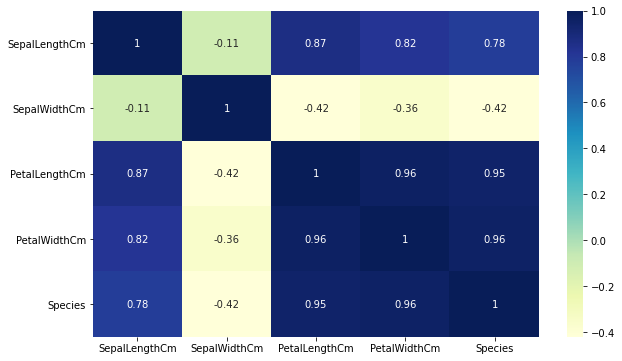

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.savefig('Correlation_Matrix1.jpg')

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='SdYlBu')
plt.savefig('Correlation_Matrix2.jpg')

ValueError: 'SdYlBu' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<Figure size 720x432 with 0 Axes>

## Multicolinearity

In [ ]:
VIF = Variance Inflation Factor
VIF = 1 to inf
Best values = 1 to 10

In [51]:
df1 = df.drop('SepalLengthCm', axis=1)
df1

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [57]:
vif_df = pd.DataFrame()
vif_df['Feature'] = df1.columns
vif_df

,Feature
0,SepalWidthCm
1,PetalLengthCm
2,PetalWidthCm
3,Species


In [55]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)
    
vif_list

[8.718375483472458, 69.65817199967945, 62.15012883122359, 35.05742271756181]

In [58]:
vif_df['VIF'] = vif_list
vif_df

,Feature,VIF
0,SepalWidthCm,8.718375
1,PetalLengthCm,69.658172
2,PetalWidthCm,62.150129
3,Species,35.057423


In [59]:
df2 = pd.DataFrame()
df2['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
df2['Features'] = df1.columns
df2

,VIF,Features
0,8.718375,SepalWidthCm
1,69.658172,PetalLengthCm
2,62.150129,PetalWidthCm
3,35.057423,Species


## Model Building/ Training

In [63]:
x = df.drop('SepalLengthCm', axis=1)  # 2D
y = df['SepalLengthCm']  # 1D

### Splitting dataset into train and test

In [64]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,2.8,4.8,1.8,2
23,3.3,1.7,0.5,0
64,2.9,3.6,1.3,1
117,3.8,6.7,2.2,2
84,3.0,4.5,1.5,1
...,...,...,...,...
75,3.0,4.4,1.4,1
43,3.5,1.6,0.6,0
22,3.6,1.0,0.2,0
72,2.5,4.9,1.5,1


In [65]:
y_train

126    6.2
23     5.1
64     5.6
117    7.7
84     5.4
      ... 
75     6.6
43     5.0
22     4.6
72     6.3
15     5.7
Name: SepalLengthCm, Length: 120, dtype: float64

In [67]:
x_test.shape

(30, 4)

In [68]:
y_test.shape

(30,)

### Create instance of Model

In [70]:
lr_model = LinearRegression()

In [71]:
lr_model

LinearRegression()

### Model Training

In [75]:
lr_model.fit(x_train, y_train)    # used to train the model

LinearRegression()

In [72]:
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,2.8,4.8,1.8,2
23,3.3,1.7,0.5,0
64,2.9,3.6,1.3,1
117,3.8,6.7,2.2,2
84,3.0,4.5,1.5,1
...,...,...,...,...
75,3.0,4.4,1.4,1
43,3.5,1.6,0.6,0
22,3.6,1.0,0.2,0
72,2.5,4.9,1.5,1


In [73]:
y_train

126    6.2
23     5.1
64     5.6
117    7.7
84     5.4
      ... 
75     6.6
43     5.0
22     4.6
72     6.3
15     5.7
Name: SepalLengthCm, Length: 120, dtype: float64

## Model Evaluation

In [76]:
y_pred = lr_model.predict(x_test)
y_pred[:5]  # Y predicted Values

array([4.92644898, 4.83643916, 5.8455153 , 4.73500362, 5.33499002])

In [86]:
x_test[:5]

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,3.4,1.4,0.3,0
3,3.1,1.5,0.2,0
113,2.5,5.0,2.0,2
12,3.0,1.4,0.1,0
24,3.4,1.9,0.2,0


In [77]:
y_test[:5]  # Y actual

6      4.6
3      4.6
113    5.7
12     4.8
24     4.8
Name: SepalLengthCm, dtype: float64

### residual

In [78]:
residual = y_test - y_pred
residual

6     -0.326449
3     -0.236439
113   -0.145515
12     0.064996
24    -0.534990
129    0.264574
25     0.157848
108    0.184742
128   -0.051215
45     0.145379
48     0.055818
42    -0.357056
35     0.316614
5     -0.047053
85    -0.468636
54     0.325245
41     0.394749
96    -0.328416
144   -0.003904
89    -0.109248
77     0.175034
74     0.297914
115   -0.021650
94    -0.292502
87     0.531987
29    -0.278066
2     -0.057056
127   -0.092014
44    -0.426435
125    0.061703
Name: SepalLengthCm, dtype: float64

## MSE

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
mse = mean_squared_error(y_test, y_pred)
print('MSE is :', mse)

MSE is : 0.0741370964548592


## RMSE

In [81]:
rmse = np.sqrt(mse)
print('RMSE is :', rmse)

RMSE is : 0.2722812818664904


## MAE

In [82]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE is :', mae)

MAE is : 0.22510825157699146


## R2_Score

In [83]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.8974054572707835

In [84]:
lr_model.score(x_test,y_test)

0.8974054572707835

## Adjusted R2_Score

In [85]:
Adjusted_r2 = 1 - (1 - r2_value)*(x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1)
Adjusted_r2

0.8945752629885981

In [89]:
lr_model.predict([[3.0, 1.9, 1.2, 2]])   # Future values we can predict

array([4.2230646])

In [87]:
x_test

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,3.4,1.4,0.3,0
3,3.1,1.5,0.2,0
113,2.5,5.0,2.0,2
12,3.0,1.4,0.1,0
24,3.4,1.9,0.2,0
129,3.0,5.8,1.6,2
25,3.0,1.6,0.2,0
108,2.5,5.8,1.8,2
128,2.8,5.6,2.1,2
45,3.0,1.4,0.3,0


In [91]:
lr_model.predict([[8.0, 1.9, 0.2, 2]])   # Future values we can predict

array([8.02283197])